In [44]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Projects\Python_Data_Project\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_7416\663385917.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Projects\Python_Data_Project\data_jobs.csv")


In [45]:
def clean_list(skills_list):  # Cleaning data - changing string to List format
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)
    
df['job_skills'] = df['job_skills'].apply(clean_list)   




In [46]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

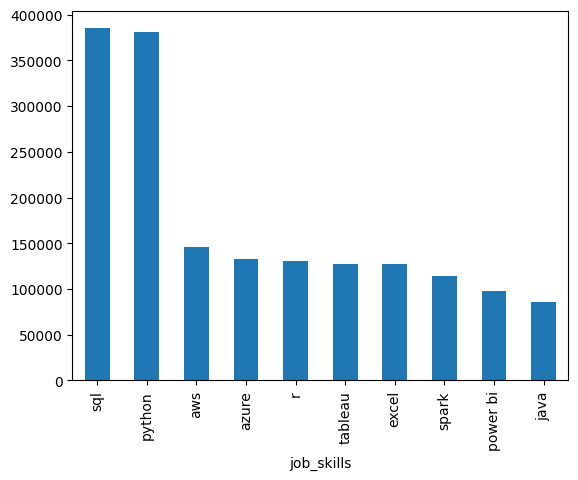

In [47]:
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [48]:
df_exploded.groupby(['job_title_short','job_skills']).aggregate('size')

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [49]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).aggregate('size')

df_skills_count = skills_count.reset_index(name = 'skill_count')

df_skills_count



,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [50]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending= False)

In [62]:
job_title = 'Data Analyst'
top_skills = 15

df_skills_final = df_skills_count[df_skills_count['job_title_short']== job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


<Axes: ylabel='job_skills'>

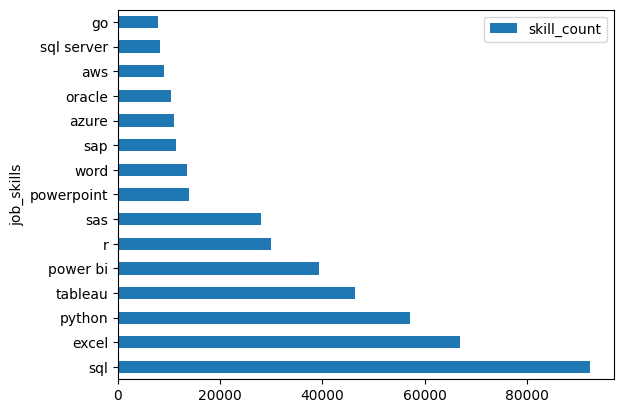

In [63]:
df_skills_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')


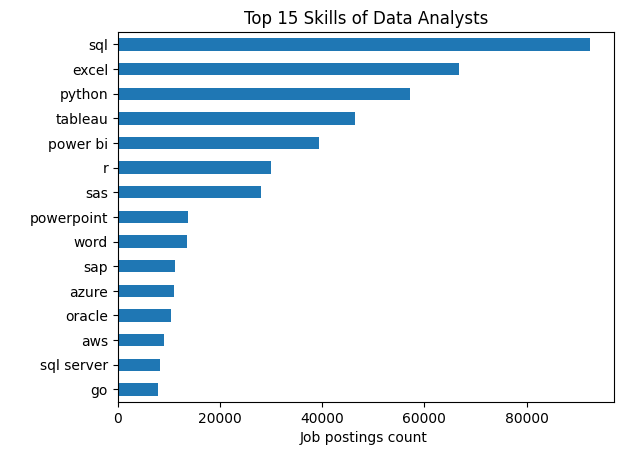

In [73]:
df_skills_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.gca().invert_yaxis()
plt.legend()
plt.title(f'Top {top_skills} Skills of {job_title}s')
plt.xlabel('Job postings count ')
plt.ylabel(' ')
plt.legend().set_visible(False)
plt.show()